In [1]:
%%capture
%pip install -qU face-alignment torch_snippets

In [7]:
%matplotlib inline
import face_alignment
from torch_snippets import read, show
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px


In [3]:
# !wget -q https://www.dropbox.com/s/lpw10qawsc5ipbn/MyImage.jpg -O MyImage.png

^C


In [4]:
fa = face_alignment.FaceAlignment(
    face_alignment.LandmarksType.TWO_D, flip_input=False, device="cpu"
)

Downloading: "https://www.adrianbulat.com/downloads/python-fan/s3fd-619a316812.pth" to /Users/yangjing/.cache/torch/hub/checkpoints/s3fd-619a316812.pth
100%|██████████| 85.7M/85.7M [01:12<00:00, 1.24MB/s]
Downloading: "https://www.adrianbulat.com/downloads/python-fan/2DFAN4-cd938726ad.zip" to /Users/yangjing/.cache/torch/hub/checkpoints/2DFAN4-cd938726ad.zip
100%|██████████| 91.9M/91.9M [01:27<00:00, 1.10MB/s]


In [5]:
input = read("MyImage.png", 1)
preds = fa.get_landmarks(input)[0]
print(preds.shape)

(68, 2)


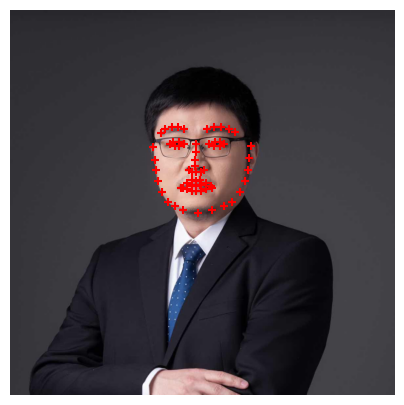

In [8]:
fig, ax = plt.subplots(figsize=(5, 5))
show(read("MyImage.png", 1), ax=ax)
ax.scatter(preds[:, 0], preds[:, 1], marker="+", c="r")
plt.show()

In [9]:
fa = face_alignment.FaceAlignment(
    face_alignment.LandmarksType.THREE_D, flip_input=False, device="cpu"
)
input = read("MyImage.png", 1)
preds = fa.get_landmarks(input)[0]

df = pd.DataFrame(preds)
df.columns = ["x", "y", "z"]

fig = px.scatter_3d(df, x="x", y="y", z="z")
fig.show()

Downloading: "https://www.adrianbulat.com/downloads/python-fan/3DFAN4-4a694010b9.zip" to /Users/yangjing/.cache/torch/hub/checkpoints/3DFAN4-4a694010b9.zip
100%|██████████| 91.9M/91.9M [00:53<00:00, 1.79MB/s]
Downloading: "https://www.adrianbulat.com/downloads/python-fan/depth-6c4283c0e0.zip" to /Users/yangjing/.cache/torch/hub/checkpoints/depth-6c4283c0e0.zip
100%|██████████| 224M/224M [02:29<00:00, 1.58MB/s] 
